In [1]:
import numpy as np

class ScratchLogisticRegression:
    def __init__(self, num_iter=1000, lr=0.01, lam=0.01, verbose=False):
        self.num_iter = num_iter
        self.lr = lr
        self.lam = lam
        self.verbose = verbose
        self.theta = None
        self.loss = []
        self.val_loss = []

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _logistic_hypothesis(self, X):
        return self._sigmoid(np.dot(X, self.theta))

    def _loss_function(self, y_pred, y_true):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def _gradient_descent(self, X, y):
        m = len(y)
        for _ in range(self.num_iter):
            y_pred = self._logistic_hypothesis(X)
            grad = np.dot(X.T, (y_pred - y)) / m
            self.theta -= self.lr * grad

    def fit(self, X, y, X_val=None, y_val=None):
        m, n = X.shape
        self.theta = np.zeros(n + 1)  # Initialize theta with bias term
        X = np.hstack([np.ones((m, 1)), X])  # Add bias term to features

        for _ in range(self.num_iter):
            self._gradient_descent(X, y)
            y_pred = self._logistic_hypothesis(X)
            loss = self._loss_function(y_pred, y)
            self.loss.append(loss)
            
            if self.verbose:
                print(f"Iteration {_}: Loss = {loss}")

            if X_val is not None and y_val is not None:
                m_val = len(y_val)
                X_val = np.hstack([np.ones((m_val, 1)), X_val])
                y_pred_val = self._logistic_hypothesis(X_val)
                loss_val = self._loss_function(y_pred_val, y_val)
                self.val_loss.append(loss_val)

    def predict(self, X):
        m = X.shape[0]
        X = np.hstack([np.ones((m, 1)), X])  # Add bias term to features
        y_pred = self._logistic_hypothesis(X)
        return np.where(y_pred >= 0.5, 1, 0)


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Step 1: Load the iris dataset
iris = load_iris()

# Use only the first two features and the first 100 samples for binary classification
X = iris.data[:100, :2]
y = iris.target[:100]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and fit the model
slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, lam=0.01, verbose=True)
slr.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_train = slr.predict(X_train)
y_pred_test = slr.predict(X_test)

# Step 5: Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Classification Report for Testing Data:")
print(classification_report(y_test, y_pred_test))


Iteration 0: Loss = 0.35550863707054414
Iteration 1: Loss = 0.24914418716767459
Iteration 2: Loss = 0.1986611686125188
Iteration 3: Loss = 0.16916134733559304
Iteration 4: Loss = 0.14973851348556305
Iteration 5: Loss = 0.13593320091137656
Iteration 6: Loss = 0.1255857439231248
Iteration 7: Loss = 0.11752223029432592
Iteration 8: Loss = 0.11104883771380383
Iteration 9: Loss = 0.10572861282929027
Iteration 10: Loss = 0.1012723213859957
Iteration 11: Loss = 0.09748067507664918
Iteration 12: Loss = 0.0942117548155607
Iteration 13: Loss = 0.09136166646654195
Iteration 14: Loss = 0.08885254824385654
Iteration 15: Loss = 0.08662485966027099
Iteration 16: Loss = 0.08463226593559989
Iteration 17: Loss = 0.08283815097227559
Iteration 18: Loss = 0.08121318333240432
Iteration 19: Loss = 0.07973358124724848
Iteration 20: Loss = 0.07837985263188912
Iteration 21: Loss = 0.0771358646597193
Iteration 22: Loss = 0.0759881462947372
Iteration 23: Loss = 0.074925358293409
Iteration 24: Loss = 0.07393788545

In [4]:
slr.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

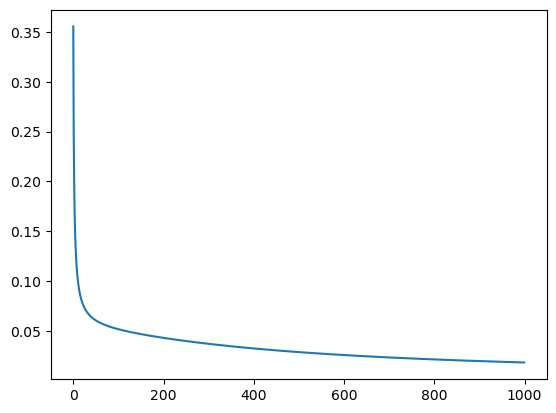

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(slr.loss)
plt.plot(slr.val_loss)

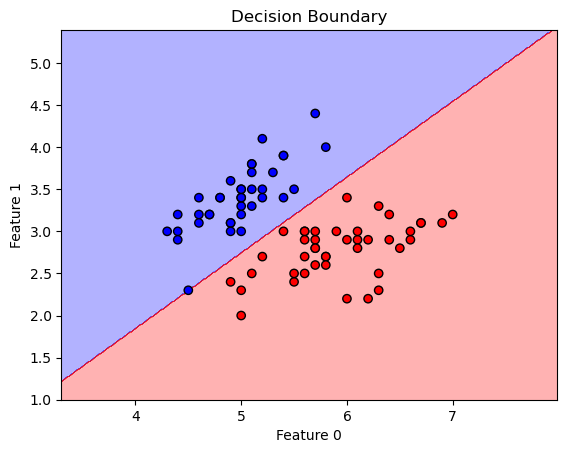

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a function to visualize the decision region
def decision_region(X, y, model):
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 0.01),
        np.arange(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, 0.01)
    )
    mesh = np.c_[mesh_f0.ravel(), mesh_f1.ravel()]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # Plot decision boundary
    plt.contourf(mesh_f0, mesh_f1, y_pred, alpha=0.3, cmap=ListedColormap(['blue', 'red']))

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['blue', 'red']), edgecolors='k')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title('Decision Boundary')

# Call the decision_region function to visualize the decision boundary
decision_region(X_train, y_train, slr)

plt.show()
